# <center> Quantum computing 0 - 100 </center>
## <center> Praveen Jayakumar </center>
### <center> IEEE IISc, Bangalore </center>
### <center> jpraveen@iisc.ac.in </center>

<img src="./images/IIScComSocLogo.jpeg" width="240" height="240" align="center"/>


Talk abstract: Quantum computers are around the corner and is right now a fast emerging field with various uses from factoring, sorting and other scientific applications. Today, quantum computers and simulators are
accessible by anyone around the world. This tutorial will cover the basic concepts of quantum
computing - qubits, quantum gates, the concept of making measurements, preparing bell states,
concept of oracles and quantum computing with oracles, Grover’s algorithm and extending it beyond a
simple quantum search. To conclude the session, I will briefly introduce and demonstrate quantum
machine learning and demonstrate this through VQE (variational quantum Eigensolvers) that are used to
make estimates of energy levels and bond lengths. All demonstrations and codes will be coded using
Qiskit.

# <center> What is quantum computing? </center>
*   Systems in which computing is performed by taking advantage of physics quantum of Quantum systems.
*    These physical systems allow *Superposition* and *Entanglement*
*    Superposition + Entanglement -> Quantum parallelism
* Exploiting quantum parallelism, quantum algorithms efficient compared to known classical algorithms could be designed.

## <center> Quantum simulators </center>


*   Physical systems like Ion traps, superconducting circuits, Photonic circuits can be used to perform quantum computation.

    *   IBM and Google are developing Superconducting quantum computers
    *   IonQ, a quantum startup is developing Ion trap based quantum computers
    *   Microsoft is working on topological systems that can be used to perform quantum computation
    *   Xanadu is developing photonics quantum computing systems

*   Quantum systems are linear, and follow linear algebra and thus can be simulated. Some python based simulators:
    *   Qiskit by IBM provides both simulators and access to actual quantum computing
    *   Cirq by Google quantum
    *   Pennylane + Strawberry fields by Xanadu

We use Qiskit for the rest of the presentation

# <center> Superposition </center>


*   Classical unit (bit) of information is 0 or 1.
*   A quantum bit (qubit) can be simulatenously 0 and 1.
* Let us represent state 0 by $\vert 0 \rangle$ and 1 by $\vert 1 \rangle$, then the superposition is $a\vert 0 \rangle + b\vert 1 \rangle$, where $a$ and $b$ are complex numbers.
* $a$ and $b$ uniquely define the superposition $\Rightarrow$ Two-dimensional complex vector $[a~b] \in \mathbb{C}^2$.
* Measurement affects superposition: Measuring $a\vert 0 \rangle + b\vert 1 \rangle$ using the standard basis ($\vert 0 \rangle, \vert 1 \rangle$) gives:

 Measurement outcome $\vert 0 \rangle$ with probability $|a|^2$

 Measurement outcome $\vert 1 \rangle$ with probability $|b|^2$

 * As probabilities add up to 1, $|a|^2+|b|^2=1$ $\Rightarrow$ $[a~b]$ is a normalized vector.

* For n qubits, the superposition is $\underset{i_1, \dots, i_n=0}{\overset{1}{\sum}} a_{i_1\dots i_n}\vert i_1 \rangle\dots \vert i_n \rangle = \underset{i_1, \dots, i_n=0}{\overset{1}{\sum}} a_{i_1\dots i_n}\vert i_1 \dots i_n \rangle$

In [6]:
#demonstrating superposition

#importing requirements
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram

#simulator
qasmsim = Aer.get_backend('qasm_simulator')

qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)
qc.draw()

┌───┐┌─┐
q_0: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

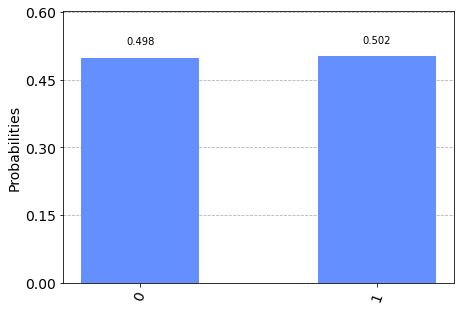

In [7]:
qobj = assemble(qc)
counts = qasmsim.run(qobj, shots = 1000).result().get_counts()
plot_histogram(counts)

Almost equal probablity of each state 0 and 1 is achieved.

Lets try to run this on an actual quantum computer, provided by IBM quantum computing cloud services:

In [8]:
# Implementing a circuit on the IBMq systems
from qiskit import IBMQ, transpile

# IBMQ.save_account(TOKEN)
IBMQ.load_account() # Load account from disk
IBMQ.providers()    # List all available providers

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [9]:
# provider  -> backend (device) -> Run transpiled circuit

provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_manila')

# hardware is configured and optimised to certain gates. 
qc_transpiled = transpile(qc, backend=backend)
counts = backend.run(qc_transpiled, shots = 1000).result().get_counts()
plot_histogram(counts)

IBMQJobInvalidStateError: 'Unable to retrieve result for job 60c1a6a4e5bd488557a95105. Job was cancelled.'

In [ ]:
backend.configuration().basis_gates

## <center> Quantum Gates </center>

* Quantum dynamics is linear + States are normalized $\Rightarrow$ Quantum operators are unitary ($UU^{\dagger} = U^{\dagger}U = \mathrm{I}$)
* Unitary gates $\Rightarrow$ Reversible computation.
* States: Normalized two-dimensional complex vectors $\Rightarrow$ Operators: Unitary $(2\times 2)$-dimensional complex matrices.
* Unitary gates on superposition: $U(a\vert 0 \rangle+b\vert 1 \rangle) = aU\vert 0 \rangle+bU\vert 1 \rangle$

* A few quantum gates:
    * X gate or Bit flip gate:
      \begin{align}
      \mathrm{X} = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}, \mathrm{X}\vert 0 \rangle = \vert 1 \rangle, \mathrm{X}\vert 1 \rangle = \vert 0 \rangle.
      \end{align}
    * Z gate or Phase flip gate:
      \begin{align}
      \mathrm{Z} = \begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}, \mathrm{Z}\vert 0 \rangle = \vert 0 \rangle, \mathrm{Z}\vert 1 \rangle = -\vert 1 \rangle.
      \end{align}
    * H gate or Hadamard gate:
  \begin{align}
  \mathrm{H} = \begin{bmatrix}1 & 1\\1 & -1\end{bmatrix}, \mathrm{H}\vert 0 \rangle = \frac{\vert 0 \rangle + \vert 1 \rangle}{\sqrt{2}} := \vert + \rangle, \mathrm{H}\vert 1 \rangle = \frac{\vert 0 \rangle - \vert 1 \rangle}{\sqrt{2}} := \vert - \rangle.
  \end{align}

Notice that $HZH = X$ and eigen states of $Z$ are $\vert 0\rangle$, $\vert 1 \rangle$, while eigen states of $X$ are $\vert +\rangle$, $\vert - \rangle$.

### Measurement

We had measured in the $\vert 0 \rangle$, $\vert 1 \rangle$ basis. In general, we can choose to measure in any (orthogonal) basis states and we would obtain different final results.
* Measuring $a\vert 0 \rangle + b\vert 1 \rangle$ using the standard basis ($\vert 0 \rangle, \vert 1 \rangle$) gives:

 Measurement outcome $\vert 0 \rangle$ with probability $|a|^2$

 Measurement outcome $\vert 1 \rangle$ with probability $|b|^2$

* Measuring $a\vert 0 \rangle + b\vert 1 \rangle$ using $\vert + \rangle, \vert - \rangle$ basis gives:

 Measurement outcome $\vert + \rangle$ with probability $|\frac{a + b}{\sqrt{2}}|^2$

 Measurement outcome $\vert - \rangle$ with probability $|\frac{a - b}{\sqrt{2}}|^2$

Lets now see a simple application of these concepts.

## <center> Quantum Key Distribution </center>
Goal: To establish a shared binary string between two parties - Alice and Bob, while protecting information from evesdropper Eve

Idea: When state $\vert +\rangle$ (or) $\vert - \rangle$ is measured in standard basis $\vert 0 \rangle, \vert 1 \rangle$, we obtain 0 and 1 with equal probability, and vice versa
![](./images/x1.jpeg)
QKD set up, image source:  https://deepai.org/publication/backflash-light-as-a-security-vulnerability-in-quantum-key-distribution-systems

Protocol:
* Alice has to transmit bit string $\bar{a} = a_1a_2\cdots a_n$. She chooses another bit string $\bar{b} = b_1b_2\cdots b_n$ to denote the basis with which she encodes her bit string into qubits $\vert \bar{q}\rangle = \vert q_1q_2\cdots q_n\rangle$.
    * If $b_i = 0$, she encodes with $\{\vert 0 \rangle, \vert 1 \rangle\}$ basis: 

        $a_i = 0 \rightarrow \vert q_i \rangle = \vert 0 \rangle$, 

        $a_i = 1 \rightarrow \vert q_i \rangle = \vert 1 \rangle$

    * If $b_i = 1$, she encodes with $\{\vert + \rangle, \vert - \rangle\}$ basis: 

        $a_i = 0 \rightarrow \vert q_i \rangle = \vert + \rangle$, 

        $a_i = 1 \rightarrow \vert q_i \rangle = \vert - \rangle$

* Alice now sends qubits $\vert q_1q_2\cdots q_n \rangle$ to Bob, without revealing basis string $\bar{b} = b_1b_2\cdots b_n$.
* Bob does not know the basis of state preparation $\bar{b}$ and randomly chooses bit string $\bar{c} = c_1c_2\cdots c_n$ that determine the basis of measurement
    * If $c_i = 0$, he measures in $\{\vert 0 \rangle, \vert 1 \rangle\}$ basis: 

        If $b_i = 0$, Bob obtains correct answer $d_i = a_i$ with probability ~ 1

        If $b_i = 1$, Bob obtains correct answer $d_i = a_i$ and wrong answer $d_i \neq a_i$ with probability ~ 0.5 each

    * If $c_i = 1$, he measures in $\{\vert + \rangle, \vert - \rangle\}$ basis: 

        If $b_i = 1$, Bob obtains correct answer $d_i = a_i$ with probability ~ 1

        If $b_i = 0$, Bob obtains correct answer $d_i = a_i$ and wrong answer $d_i \neq a_i$ with probability ~ 0.5 each


<img src="./images/qkd_basis.png" width="800" height="800" align="center"/>

Image source: https://www.slideshare.net/jinxbinx/introduction-to-quantum-computation-part-1-28029623

* Finally, Bob tells Alice that he has performed measurements. Alice and Bob publicly exchange basis strings $\bar{b}$ and $\bar{c}$.
* In both above cases, if $b_i = c_i$ (they choose the same basis), measurement is performed in the same basis and answers will almost always be correct, an for basis mismatch, would be wrong for half the bits.
* Hence they retain the bit results $a_i$ and $d_i$ respectively at positions where they used the same basis bits $b_i = c_i$.

Advantange: Information is physically protected from evesdropping and third parties. Eve does not know the basis used by Alice. If Eve tries to obtain information by performing measurements, Bob would receive altered qubits with too many errors and this can be detected by statistical methods. This can be performed by using a small fraction of the obtained bit strings $\bar{a}$ and $\bar{d}$ to verify integrity.

![](./images/qkd.png)

### Few other gates

* S gate or Phase gate:
  \begin{align}
  \mathrm{S} = \begin{bmatrix}1 & 0\\0 & \mathrm{i}\end{bmatrix}, \mathrm{S}\vert 0 \rangle = \vert 0 \rangle, \mathrm{S}\vert 1 \rangle = \mathrm{i}\vert 1 \rangle.
  \end{align}
      

* CNOT gate or Controlled-NOT gate: (2 qubit gate)
  \begin{align}
  \mathrm{CNOT} &= \begin{bmatrix}1 & 0 & 0 & 0\\0 & 1 & 0 & 0\\ 0 & 0 & 0 & 1\\ 0 & 0 & 1 & 0\end{bmatrix}, \\
  \mathrm{CNOT}\vert 00 \rangle = \vert 00 \rangle, &\mathrm{CNOT}\vert 01 \rangle = \vert 01 \rangle, \mathrm{CNOT}\vert 10 \rangle = \vert 11 \rangle, \mathrm{CNOT}\vert 11 \rangle = \vert 10 \rangle.
  \end{align}

  Controlled-NOT because the NOT operation, i.e., the X operation, is performed on 2nd qubit only when 1st qubit is $\vert 1\rangle$, else, no operation is performed. 
* Universal set of gates: All one qubit gates + CNOT.

## <center> Bloch Sphere </center>

* A qubit: $\vert \psi \rangle = a \vert 0\rangle + b\vert 1 \rangle$.

  As $|a|^2 + |b|^2 = 1$, let $a = |a| e^{i\phi_0}$ and $b = |b| e^{i\phi_1}$, then

\begin{align}
\vert \psi \rangle &= a \vert 0\rangle + b\vert 1 \rangle = |a| e^{i\phi_0}\vert 0\rangle + |b| e^{i\phi_1} \vert 1 \rangle\\
\vert \psi \rangle &= e^{i\phi_0}(|a| \vert 0\rangle + |b| e^{i(\phi_1-\phi_0)} \vert 1 \rangle\\
\vert \psi \rangle &= e^{i\phi_0}(\mathrm{cos}~ \theta \vert 0\rangle + \mathrm{sin} ~\theta e^{i\phi} \vert 1 \rangle,
\end{align}
where $\phi = \phi_0-\phi_1$, $|a|=\mathrm{cos}~ \theta$, and $|b|=\mathrm{sin}~ \theta$.

* Bloch sphere: A sphere with spherical coordinates $[1,\theta,\phi]$ (Radius is 1 as the state is normalized).
* Pure states: On the surface of the Bloch sphere
* Mixed states: Inside the bloch sphere

<img src="./images/Bloch_sphere.png" width="400" height="400" align="center"/>

In [ ]:
# bloch sphere representation demonstration
from numpy import pi
from qiskit.quantum_info import Statevector
%matplotlib inline

statesim = Aer.get_backend('statevector_simulator')

q = QuantumCircuit(1)
q.u3(0, pi/2, 0, 0)

state = Statevector.from_instruction(q)
plot_bloch_multivector(state)

## <center> Entanglement </center>

* Two states are entangled when the state of one qubit cannot be described independently of the other.
* Entanglement $\Rightarrow$ Correlation between particle irrespective of the distance between them
* Entanglement cannot be created locally. 
* Example: Bell state: $(\vert 00\rangle + \vert 11\rangle)/\sqrt{2}$. 


In [10]:
# bell state 
qc2 = QuantumCircuit(2, 2)
qc2.h(0)
qc2.cx(0, 1)
qc2.measure([0, 1], [0, 1])
qc2.draw()

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

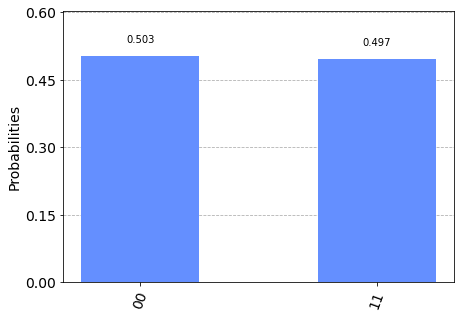

In [11]:
qobj = assemble(qc2)
counts = qasmsim.run(qobj, shots = 1000).result().get_counts()
plot_histogram(counts)

* Applications: 
   * Quantum teleportation: Transfer information in one qubit using one Bell pair and transmitting two classical bits over a classical channel.
   * Super dense coding: Transfer two classical bits using one Bell pair where one qubit of the Bell pair is transmitted over the classical channel.
   * Quantum error correction: Due to No cloning theorem, quantum information cannot be copied. Store quantum information redundantly using entanglement making error correction possible. 
* Mixed state: Ensemble representation of a qubit in an entangled state:

<center> First qubit of Bell state: $\rho = \{(0.5,\vert 0\rangle), (0.5,\vert 0\rangle)\}$.<center>

## <center> Searching </center>
 * Classically, to find an object in an unsorted list, it requires us to check every item of the list. If the number of elements is n, it requires at max n checks to find an element. Complexity of search: $\mathcal{O}(n)$

 * Using Grover's search algorithm Grover's quantum on an unsorted database, one can find an object with just $\mathcal{O}(\sqrt{n})$ checks.

 * The Grover's search algorithm consists of 2 steps:
     * Oracle creation
     * Amplitude amplification
 

* Oracle creation: 
  * Classical function: $f_w(x) = 0$ if $x\neq w$ and $f_w(x) = 1$ if $x=w$.
  * Quantum function: 
  \begin{align}
  \vert x \rangle &\vert y \rangle \xrightarrow{U_w} \vert x \rangle \vert y \oplus f_w(x) \rangle,\\
   \text{which is }\text{equivalent to}\\
   \vert x \rangle  &\rightarrow{U_w}(-1)^{f_w(x)}\vert x \rangle,\text{ when }\vert y \rangle = (\vert 0 \rangle - \vert 1 \rangle)/\sqrt{2}, \\
  \Rightarrow U_w &= \mathrm{I} - 2\vert w \rangle \langle w\vert
      \end{align}
     Thus, the oracle flips sign of state $\vert w\rangle$ but does not change the other states.

* Amplitude Amplification: 
  * First prepare a equiprobable normalized superposition of all possible values of $x$ (Hadamard gates $\mathrm{H}$ on $\vert 0\rangle$s):
\begin{align}
\vert s \rangle  = \frac{1}{\sqrt{n}}\underset{x=1}{\overset{n}{\sum}}\vert x \rangle.
\end{align}
 * We next perform the Grover's interations: Grover iteration comprises of 2 steps:
     *  Apply the operator $U_w = \mathrm{I} - 2\vert w \rangle \langle w\vert$ to the state $\vert \psi \rangle$. For the first iteration, $\vert \psi \rangle = \vert s \rangle$.
     * Apply the operator $U_s = 2\vert s \rangle\langle s \vert - \mathrm{I}$ which preserves $s$ but flips sign of states orthogonal to $\vert s\rangle$.

     Let $\vert \psi\rangle = \underset{x=1}{\overset{n}{\sum}}a_x\vert x\rangle$. Then, $U_s \vert \psi\rangle = \underset{x=1}{\overset{n}{\sum}} (2\langle a \rangle-a_x)\vert x \rangle$. 
\begin{align}
  \text{Let }a_x = \langle a \rangle + a_d \Rightarrow (2\langle a \rangle - a_x) = \langle a \rangle - a_d
\end{align}
Thus, the amplitudes are inverted along the mean amplitude.
* After the Grover's iteration is applied for $\sqrt{n}$ times, the amplitudes $a_x = 0$ for  $x \neq w$ and $a_w=1$.

<img src="./images/GroverAlgo.png" width="1080" height="1920" align="center"/>

We can numerically determine the number of Grover's iterations required and we obtain it as $\sqrt{n}$

In [12]:
#grover's algorithm (oracle identifies string s) 2 bit string

grovers = QuantumCircuit(2, 2)

#creating equal superposition
grovers.h([0, 1])
#grovers.draw()

In [13]:
#applying oracle to mark string s
s = '10'
for i in range(len(s)):
    if s[i] == '0':
        grovers.x(i)
grovers.cz(0, 1)
for i in range(len(s)):
    if s[i] == '0':
        grovers.x(i)

In [14]:
#amplitude amplification (I - |S>)
grovers.h([0, 1])
grovers.z([0, 1])
grovers.cz(0, 1)
grovers.h([0, 1])

grovers.draw()

┌───┐        ┌───┐┌───┐        ┌───┐
q_0: ┤ H ├──────■─┤ H ├┤ Z ├──────■─┤ H ├
     ├───┤┌───┐ │ ├───┤├───┤┌───┐ │ ├───┤
q_1: ┤ H ├┤ X ├─■─┤ X ├┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘└───┘└───┘   └───┘
c: 2/════════════════════════════════════

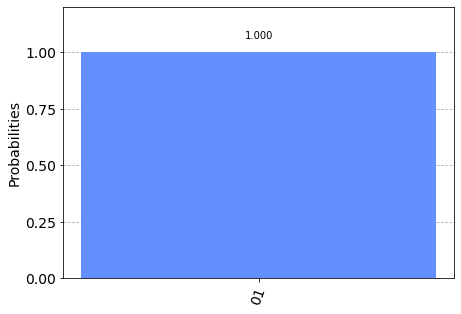

In [15]:
grovers.measure([0, 1], [0, 1])
qobj = assemble(grovers)
counts_grovers = qasmsim.run(qobj).result().get_counts()
plot_histogram(counts_grovers)

## <center> Oracles </center>
In the algorithm above, we used an oracle to mark the required state. An oracle can be thought of as a blackbox that given an input, spits out the corresponding answer.
oracles can be designed for tasks like 
* Determining if the given input is the required target, 
* For calculating some hidden function $f$ on the input. 
* It can also be used to mark if the given input satisfies some criteria ie verify if it is a solution, satisfiability problem. grover's algorithm can be used to solve NP complete problems.

NP problems are those who's solutions are hard to find but easy to verify. Thus when given a superposition of all posible solution states, the quantum oracle marks the solution state. In the next step, the amplitude of the marked state will be amplified.

The example illustrated where we marked string 01, the problem can be recast into a clause $(\bar{x_1}\wedge x_2)$

In general we can solve the 3 satisfiability (3-SAT) problem by recasting the string into maximally disjoint clauses of the form
$(x_1 \vee x_2 \vee x_3)\wedge(x_4\vee x_5 \vee x_6)\wedge \cdots $



## <center> VQE and optimization using quantum computers </center>

* In chemistry and biology, we require to estimate and predict various parameters of molecules to study and understand their properties.
* Estimating these properties using classical computers and algorithms are computationally hard. Quantum systems have entanglement and superposition that are hard to efficiently simulate on classical systems.
* As Prof. Feynman had once said, quantum computer would be better to efficiently simulate quantum systems.  
* An important parameter that determines the stability and various properties is the bond length of the molecule.


* The bond length by definition minimizes the energy of the molecule. This hints at designing a quantum optimizer parameterized by the bond length and outputs the estimated energy.
* We can then optimize the circuit (by optimizing parameters like bond length) to obtain the least energy possible.

### Other applications

* Matrix inversion by HHL method - to solve linear equations efficiently
    Uses phase estimation and conditional rotational gates to approximately invert matrices
* Optimization using QAOA - Start with a known hamiltonian $H_0$ and the lowest eigen state and quasi-statically evolve to the required hamiltonian $H_1$. Due to Adiabaticity, the final state of the system would also be the lowest eigen state of $H_1$.
* Shor's factoring algorithm - To solve discrete logarithm problem using phase estimation- Can solve with exponential speed up over classical methods and break RSA encryption.

## <center> Questions </center>
<center> Any questions? </center>

## <center> References </center>
* Quantum Computation and Quantum Information, 10th edition, Michael Nielsen and Isaac Chuang.
* [Qiskit textbook](https://qiskit.org/textbook/preface.html)
* Qiskit documentation
* [MIT OCW lecture notes on Grover's algorithm](https://ocw.mit.edu/courses/mathematics/18-435j-quantum-computation-fall-2003/lecture-notes/qc_lec11.pdf)

## <center> Acknowledgements </center>
* I would like to thank Dr. Priya Nadkarni for helping with preparation and proof reading of the presentation.
* I would like to thank my Advisor Prof. Shayan Garani.
* I would like to thank IEEE IISc for this opportunity.

* I would also like to thank all members of the audience for taking your time to attend this tutorial/talk.

# <center> Thank you! </center>
<img src="./images/quantum_teleportation_xkcd.png" width="1080" height="900" align="center"/>